In [3]:
!pip install ultralytics

# labels are: class x1 y1 x2 y2 x3 y3 x4 y4   (normalized)


     ---------------------------------------- 1.1/1.1 MB 6.8 MB/s eta 0:00:00
     ------------------------------------- 772.7/772.7 KB 24.6 MB/s eta 0:00:00
     --------------------------------------- 40.1/40.1 MB 17.7 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\jayjo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import sys, platform, torch
print('Python:', sys.version.split()[0])
print('CUDA available:', torch.cuda.is_available())
print('CUDA device count:', torch.cuda.device_count())
if torch.cuda.is_available():
    print('CUDA device:', torch.cuda.get_device_name(0))
print('Platform:', platform.platform())

c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Python: 3.9.13
CUDA available: False
CUDA device count: 0
Platform: Windows-10-10.0.19045-SP0


In [5]:
%pip -q install ultralytics roboflow==1.* opencv-python matplotlib
import ultralytics, cv2, matplotlib
from ultralytics import YOLO
print('ultralytics', ultralytics.__version__)

You should consider upgrading via the 'c:\Users\jayjo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.
Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\jayjo\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
ultralytics 8.3.216


In [6]:

import zipfile, glob, os

# TODO: If using a local ZIP export, set your zip file path here
ZIP_PATH = 'C:\\Users\\jayjo\\Downloads\\QualitiyControl\\QualityControl-PBA\\backend\\ceramic-tile-defects.v1i.yolov8.zip'  # e.g., 'Ceramic-Tile-Defects-9.yolov8.zip'

if ZIP_PATH and os.path.exists(ZIP_PATH):
    with zipfile.ZipFile(ZIP_PATH, 'r') as z:
        z.extractall('dataset_yolov8')
    # Try to locate data.yaml
    candidates = glob.glob('dataset_yolov8/**/data.yaml', recursive=True)
    if candidates:
        DATA_DIR = os.path.dirname(candidates[0])
        print('Unzipped. DATA_DIR =', DATA_DIR)
    else:
        print('Could not find data.yaml; check ZIP structure')
else:
    print('No ZIP provided or path not found; using Option A if set.')

Unzipped. DATA_DIR = dataset_yolov8\ceramic-tile-defects.v1i.yolov8


Classes: ['edge-chipping', 'hole', 'line']
Train: ../train/images
Val: ../valid/images
Test: ../test/images


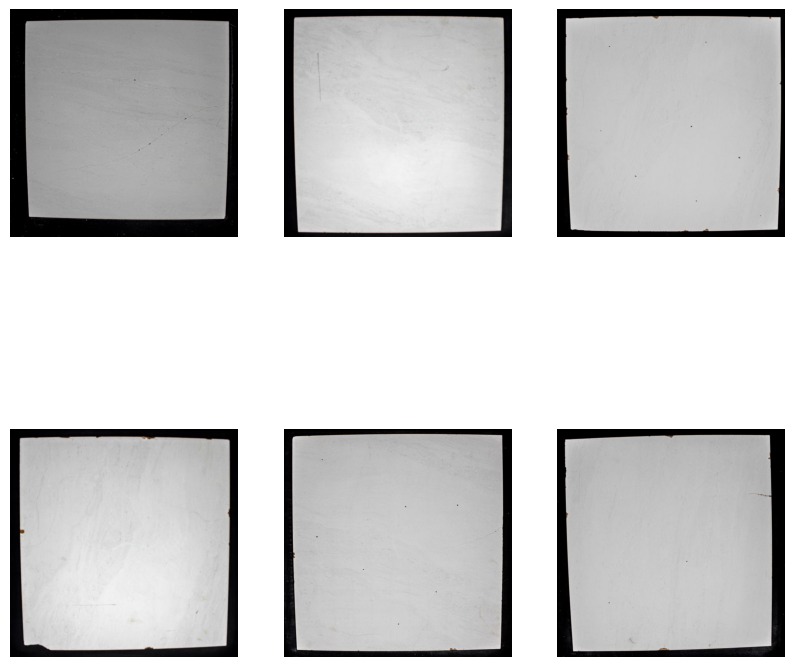

In [7]:
import os, yaml, random, matplotlib.pyplot as plt
from pathlib import Path

assert DATA_DIR is not None, "DATA_DIR is None. Use Option A or B to set it to the YOLO dataset root."
yaml_path = Path(DATA_DIR) / 'data.yaml'
with open(yaml_path, 'r') as f:
    data_cfg = yaml.safe_load(f)

print('Classes:', data_cfg.get('names', []))
print('Train:', data_cfg.get('train'))
print('Val:', data_cfg.get('val') or data_cfg.get('valid'))
print('Test:', data_cfg.get('test'))

# Show a few training images with labels (Ultralytics has a built-in visualizer too)
from glob import glob
train_imgs = glob(os.path.join(DATA_DIR, 'train', 'images', '*'))
random.shuffle(train_imgs)
show_n = min(6, len(train_imgs))

plt.figure(figsize=(10,10))
for i, img_path in enumerate(train_imgs[:show_n]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(show_n//3 + (show_n%3>0), 3, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()
